In [2]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

  Obtaining dependency information for openmeteo-requests from https://files.pythonhosted.org/packages/c8/01/b2dae93c5af92a95c3a744b808979c32766bc4eabdef87c2ab0cc0f57c27/openmeteo_requests-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for openmeteo-sdk>=1.4.0 from https://files.pythonhosted.org/packages/be/a9/9bdf71a98265be6aa609cb297300eb65ed4c33802b87f5842211f7b0780a/openmeteo_sdk-1.11.3-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.0.0 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
Using cached flatbuffers-24.3.7-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Obtaining dependency in

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (25, 5)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# LES DONNES METEO DE LA VILLE D'ABIDJAN

In [4]:
# import openmeteo_requests

# import requests_cache
# import pandas as pd
# from retry_requests import retry

# # Setup the Open-Meteo API client with cache and retry on error
# cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
# retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
# openmeteo = openmeteo_requests.Client(session = retry_session)

# # Make sure all required weather variables are listed here
# # The order of variables in hourly or daily is important to assign them correctly below
# url = "https://archive-api.open-meteo.com/v1/archive"
# params = {
#     "latitude": 5.316667,
#     "longitude": -4.033333,
#     "start_date": "2020-01-01",
#     "end_date": "2023-12-31",
#     "hourly": "temperature_2m"
# }
# responses = openmeteo.weather_api(url, params=params)

# # Process first location. Add a for-loop for multiple locations or weather models
# response = responses[0]
# print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
# print(f"Elevation {response.Elevation()} m asl")
# print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
# print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# # Process hourly data. The order of variables needs to be the same as requested.
# hourly = response.Hourly()
# hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

# hourly_data = {"date": pd.date_range(
#     start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
#     end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
#     freq = pd.Timedelta(seconds = hourly.Interval()),
#     inclusive = "left"
# )}
# hourly_data["temperature_2m"] = hourly_temperature_2m

# hourly_dataframe = pd.DataFrame(data = hourly_data)
# filepath = "D:/Data science/temperature_abidjan.csv"
# # Enregistrement des données dans un fichier CSV
# hourly_dataframe.to_csv(filepath, index=False)
# print(hourly_dataframe)



Coordinates 5.307557106018066°N -4.019866943359375°E
Elevation 11.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                           date  temperature_2m
0     2020-01-01 00:00:00+00:00       26.984499
1     2020-01-01 01:00:00+00:00       26.784500
2     2020-01-01 02:00:00+00:00       26.684500
3     2020-01-01 03:00:00+00:00       26.584499
4     2020-01-01 04:00:00+00:00       25.884499
...                         ...             ...
35059 2023-12-31 19:00:00+00:00       27.134499
35060 2023-12-31 20:00:00+00:00       27.034500
35061 2023-12-31 21:00:00+00:00       27.034500
35062 2023-12-31 22:00:00+00:00       26.734499
35063 2023-12-31 23:00:00+00:00       26.884499

[35064 rows x 2 columns]


In [40]:
data = pd.read_csv('D:/Data science/temperature_abidjan.csv', index_col=None)
data.head()

,date,temperature_2m
0,2020-01-01 00:00:00+00:00,26.984499
1,2020-01-01 01:00:00+00:00,26.784500
2,2020-01-01 02:00:00+00:00,26.684500
3,2020-01-01 03:00:00+00:00,26.584500
4,2020-01-01 04:00:00+00:00,25.884499


In [41]:
# Convertir la colonne de dates en type datetime
data['date'] = pd.to_datetime(data['date'])

# Supprimer la partie "+00:00" du format de date
data['date'] = data['date'].dt.strftime('%Y-%m-%d %H:%M')
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,temperature_2m
0,2020-01-01 00:00:00,26.984499
1,2020-01-01 01:00:00,26.784500
2,2020-01-01 02:00:00,26.684500
3,2020-01-01 03:00:00,26.584500
4,2020-01-01 04:00:00,25.884499


In [41]:
#data.rename(columns={'date': 'dates'}, inplace=True)

In [4]:
data.head()

,date,temperature_2m
0,2020-01-01 00:00:00,26.984499
1,2020-01-01 01:00:00,26.784500
2,2020-01-01 02:00:00,26.684500
3,2020-01-01 03:00:00,26.584500
4,2020-01-01 04:00:00,25.884499


In [5]:
data.shape

(35064, 2)

In [59]:
print(data.index.name)

None


In [60]:
data['date'].dtype

dtype('<M8[ns]')

In [42]:
# Définir la colonne 'date' comme index
data.set_index('date', inplace=True)

# Calculer la moyenne des valeurs à chaque intervalle de 3 heures
data1 = data.resample('3H').mean()
data1.head()

,temperature_2m
date,
2020-01-01 00:00:00,26.817833
2020-01-01 03:00:00,26.101166
2020-01-01 06:00:00,26.017833
2020-01-01 09:00:00,28.117833
2020-01-01 12:00:00,29.317832


In [7]:
data1.shape

(11688, 1)

In [8]:
data1.dtypes

temperature_2m    float64
dtype: object

In [8]:
# data = data1.reset_index()
# data.head()

In [ ]:
# Representation de la temperature

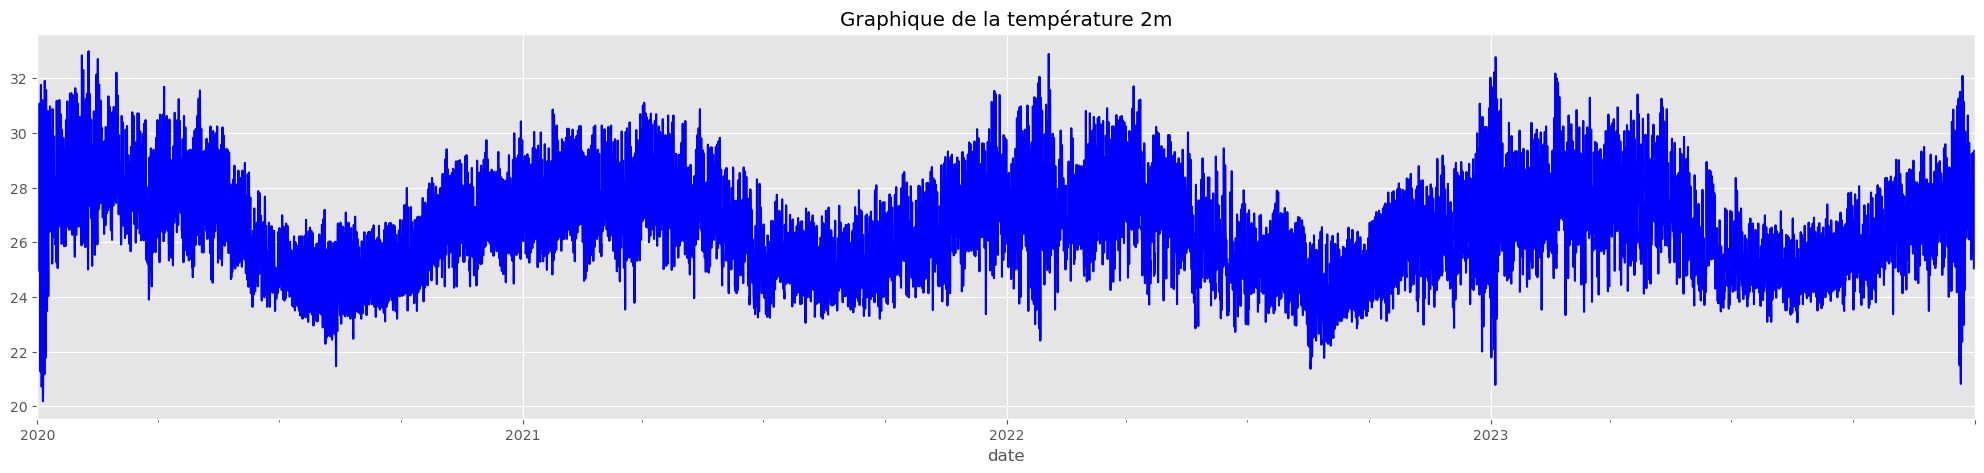

In [9]:
# Spécifier la couleur bleue
color = 'blue'

# Tracer le graphique avec Matplotlib
data1['temperature_2m'].plot(color=color)

# Ajouter un titre
plt.title('Graphique de la température 2m')

# Afficher le graphique
plt.show()

In [ ]:
# Analyse des composants 

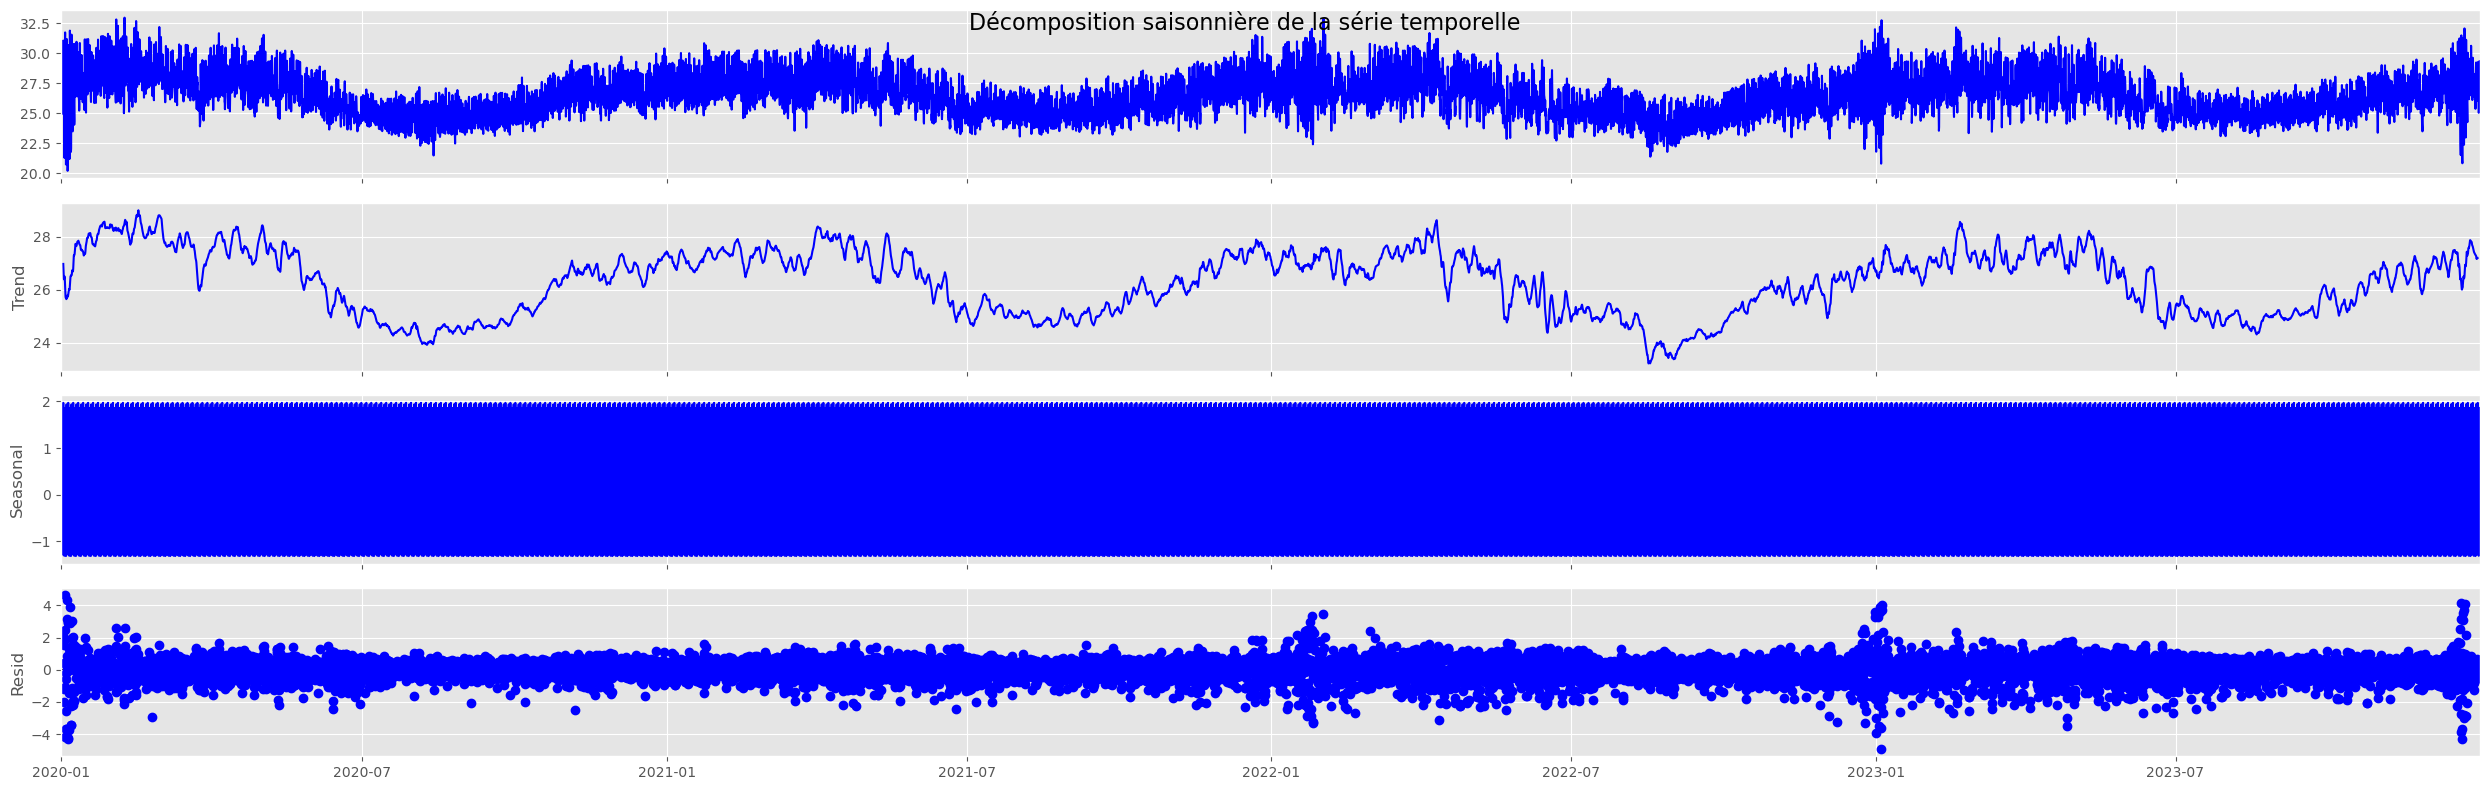

In [8]:
from statsmodels.api import tsa
import matplotlib.pyplot as plt

# Décomposer la série temporelle
res = tsa.seasonal_decompose(data1)

# Personnaliser la taille de la figure
plt.rc("figure", figsize=(25, 8))

# Tracer les composantes décomposées avec Matplotlib
resplot = res.plot()

# Ajouter un titre au graphique
plt.suptitle('Décomposition saisonnière de la série temporelle', fontsize=16)

# Personnaliser la couleur des composantes (bleu)
for ax in resplot.axes:
    ax.lines[0].set_color('blue')

# Afficher le graphique
plt.show()

In [ ]:
# Interpretation:
# On a une tendense periodique les données sembles se repetée sur un perionde de un an soit 12 mois 

In [ ]:
# verifions la stationnarité des donneés 


In [9]:
from statsmodels.tsa import stattools

# Augmented Dickey-Fuller test
def check_adf_stat(ts):

  adf_results = stattools.adfuller(ts)
  adf_stat = adf_results[0]
  p_value = adf_results[1]
  critical_values = adf_results[4]

  print(f'The Augmented Dickey-Fuller test results\
          \n  test statistic {adf_stat:.3f},\
          \n  p-value: {p_value:.3f}\
          \n  critical values: {critical_values}')

  if (p_value > 0.05) or (adf_stat > critical_values['5%']):
    # there is a unit root
    print('The time series is NOT stationary')
  else:
    # there is no unit roots
    print('The time series is stationary')

warnings.filterwarnings('ignore')
check_adf_stat(data1)

The Augmented Dickey-Fuller test results          
  test statistic -3.987,          
  p-value: 0.001          
  critical values: {'1%': -3.4309115816789784, '5%': -2.8617881895614543, '10%': -2.566902106222889}
The time series is stationary


In [ ]:
# Implementation des methodes statistiques 

In [ ]:
# Determination des paramètre p et q

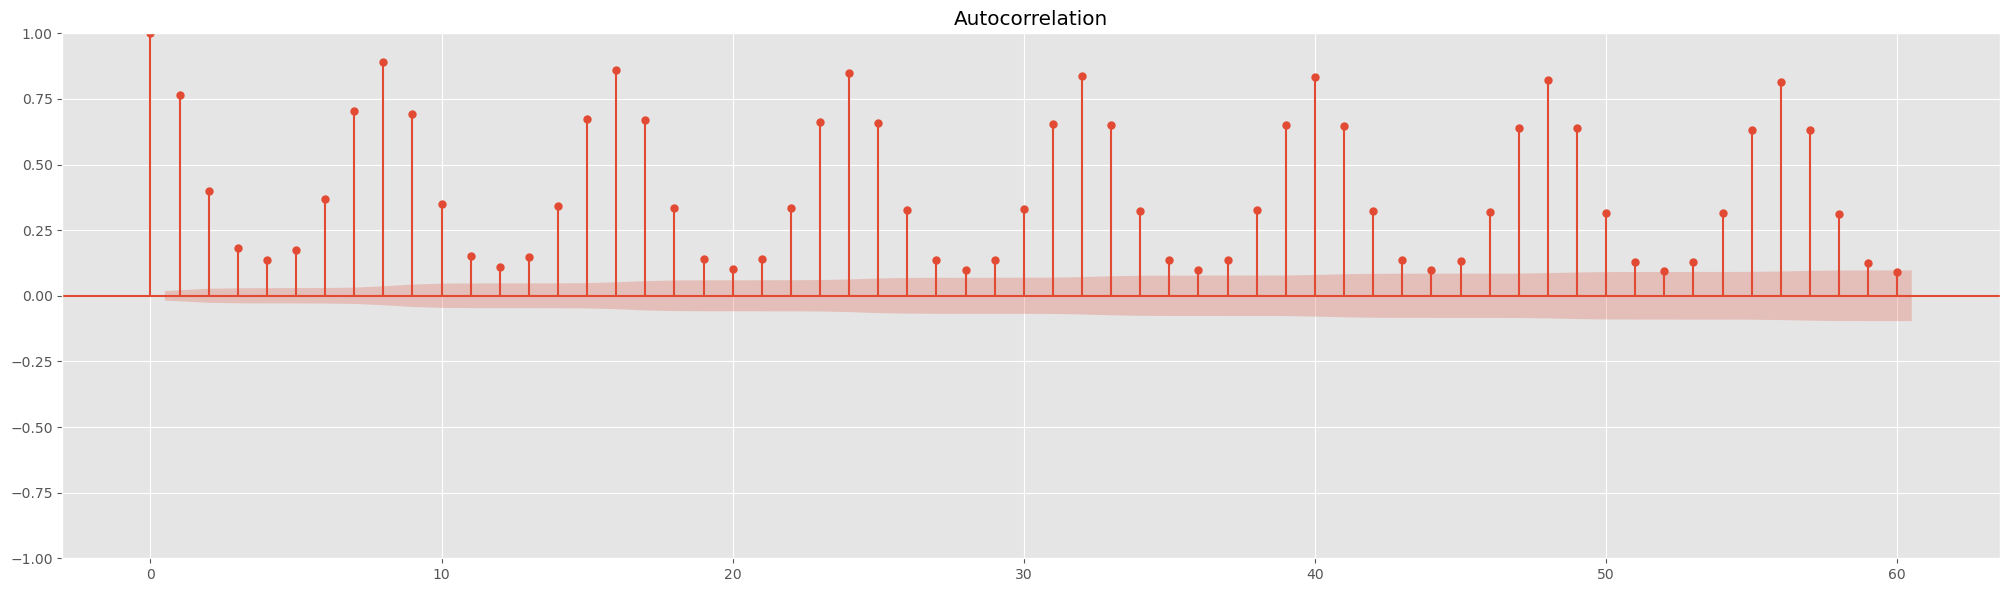

In [10]:
import statsmodels.graphics.tsaplots as tsaplots

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(data1, lags=60, ax=ax1);

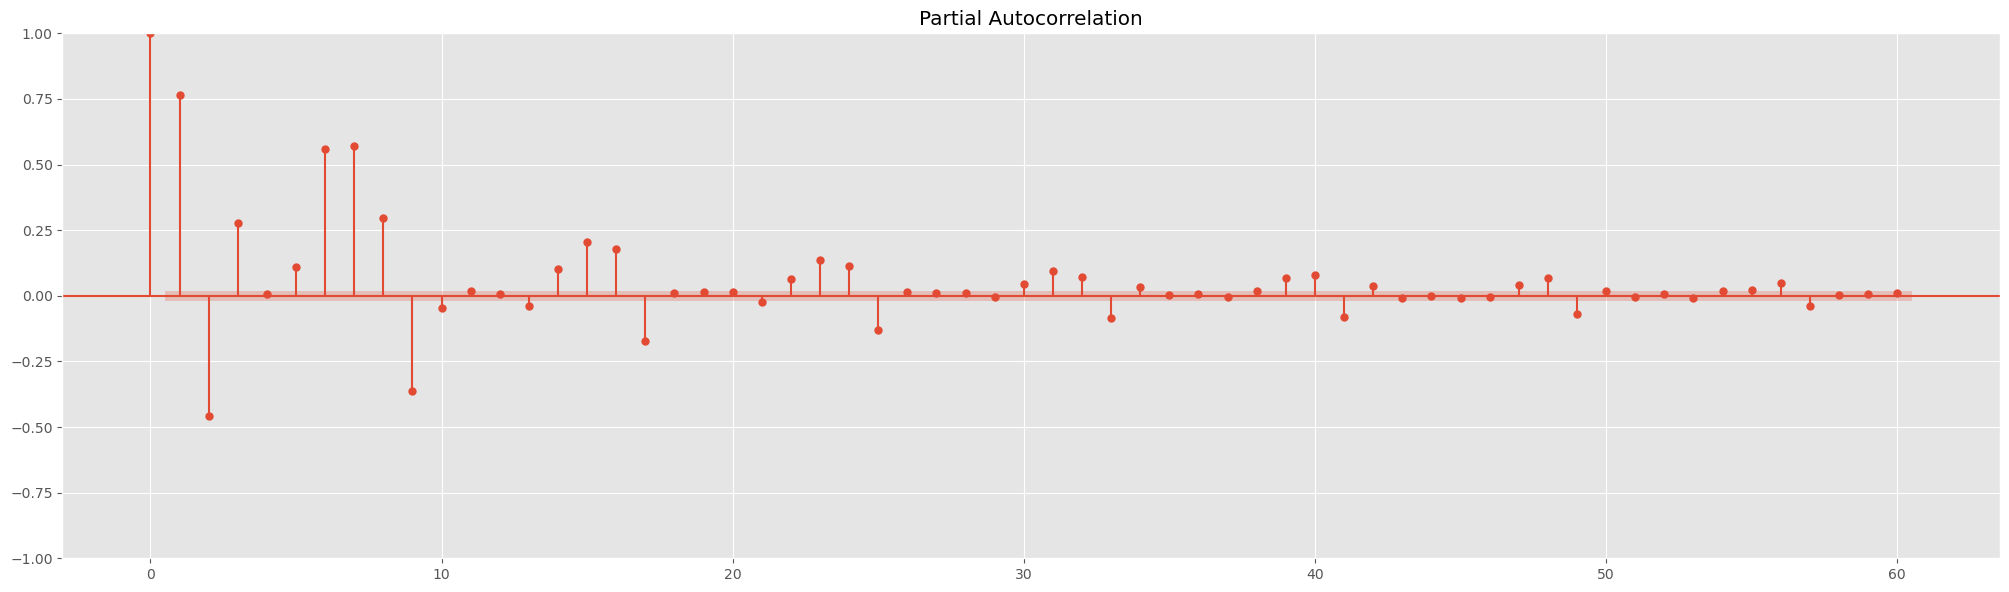

In [11]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_pacf(data1, lags=60, ax=ax1)

In [ ]:
# la methode ARIMA

In [43]:
# Split data into train (80%) and test (20%) sets
ind_split = int(len(data1) * 0.8)

ts_train = data1[:ind_split]
ts_test = data1[ind_split:]

data1.shape, ts_train.shape, ts_test.shape

((11688, 1), (9350, 1), (2338, 1))

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# p,d,q
order=(7,1,7)

model = ARIMA(ts_train, order=order).fit()
print(model.summary()) 

                               SARIMAX Results                                
Dep. Variable:         temperature_2m   No. Observations:                 9350
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -7443.032
Date:                Fri, 29 Mar 2024   AIC                          14916.064
Time:                        19:42:31   BIC                          15023.210
Sample:                    01-01-2020   HQIC                         14952.454
                         - 03-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0788      0.028     -2.818      0.005      -0.134      -0.024
ar.L2         -0.1716      0.023     -7.387      0.000      -0.217      -0.126
ar.L3         -0.8439      0.024    -35.722      0.0

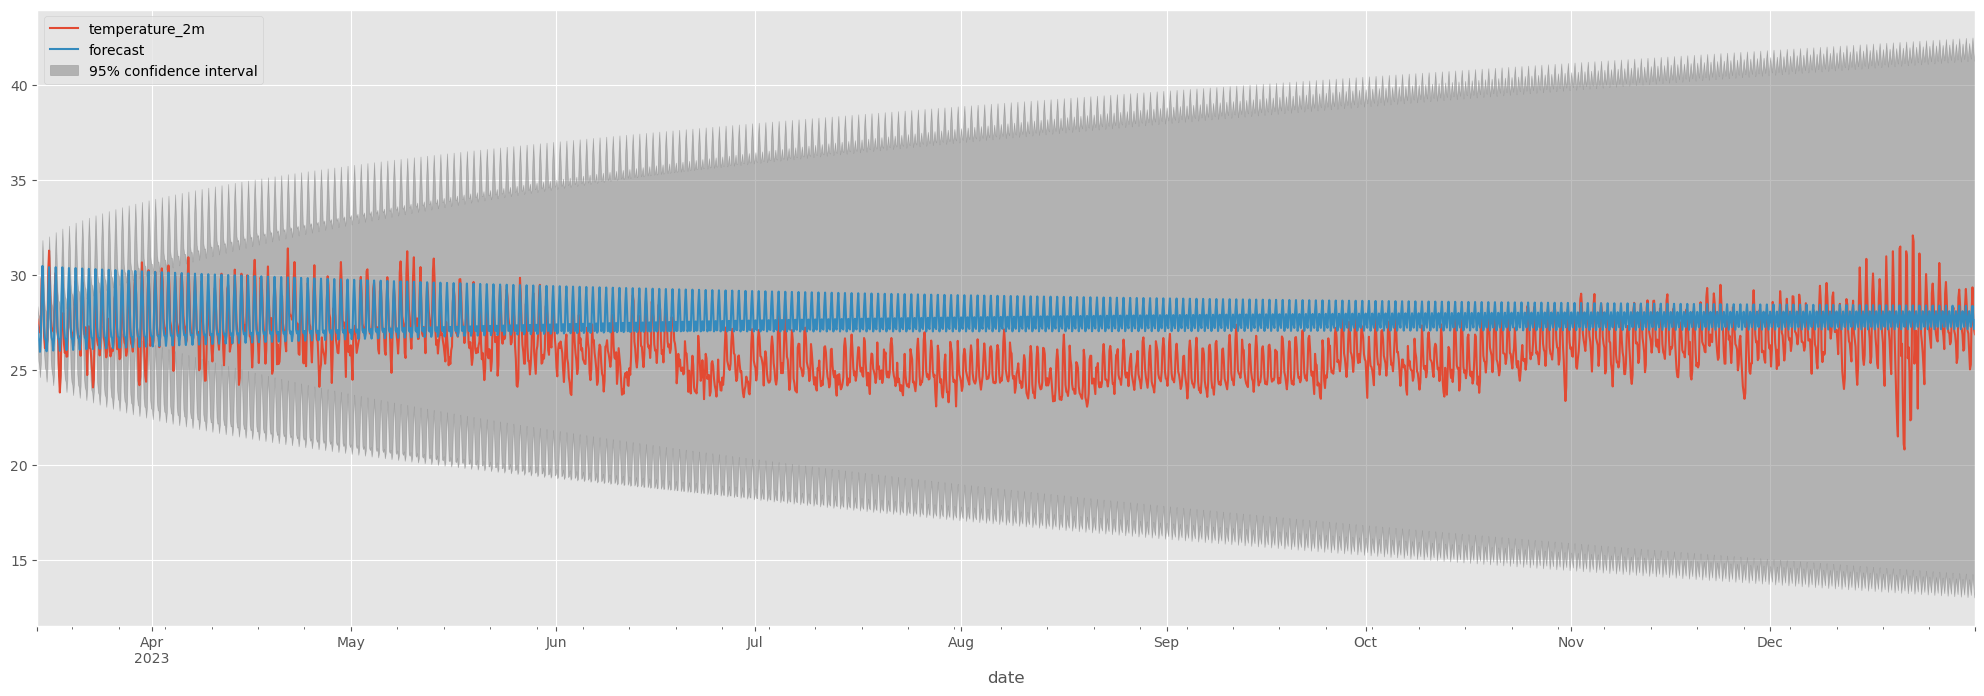

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = ts_test.plot(ax=ax, label='Test Data')
fig = plot_predict(model, start=ts_test.index[0], end=ts_test.index[-1], dynamic=False, ax=ax)
legend = ax.legend(loc="upper left")
plt.show()

In [45]:
forecast = model.forecast(steps=10)
print(forecast)

2023-03-14 18:00:00    27.333117
2023-03-14 21:00:00    26.711123
2023-03-15 00:00:00    26.529861
2023-03-15 03:00:00    25.959245
2023-03-15 06:00:00    26.674516
2023-03-15 09:00:00    28.991053
2023-03-15 12:00:00    30.478049
2023-03-15 15:00:00    29.176266
2023-03-15 18:00:00    27.311631
2023-03-15 21:00:00    26.677075
Freq: 3H, Name: predicted_mean, dtype: float64


In [ ]:
# SARIMA

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# p,d,q
order = (7, 1, 7)
seasonal_order = (0, 0, 0, 0)  

model = SARIMAX(ts_train, order=order, seasonal_order=seasonal_order)
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:         temperature_2m   No. Observations:                 9350
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -7443.032
Date:                Thu, 28 Mar 2024   AIC                          14916.064
Time:                        00:44:16   BIC                          15023.210
Sample:                    01-01-2020   HQIC                         14952.454
                         - 03-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0788      0.028     -2.818      0.005      -0.134      -0.024
ar.L2         -0.1716      0.023     -7.387      0.000      -0.217      -0.126
ar.L3         -0.8439      0.024    -35.722      0.0

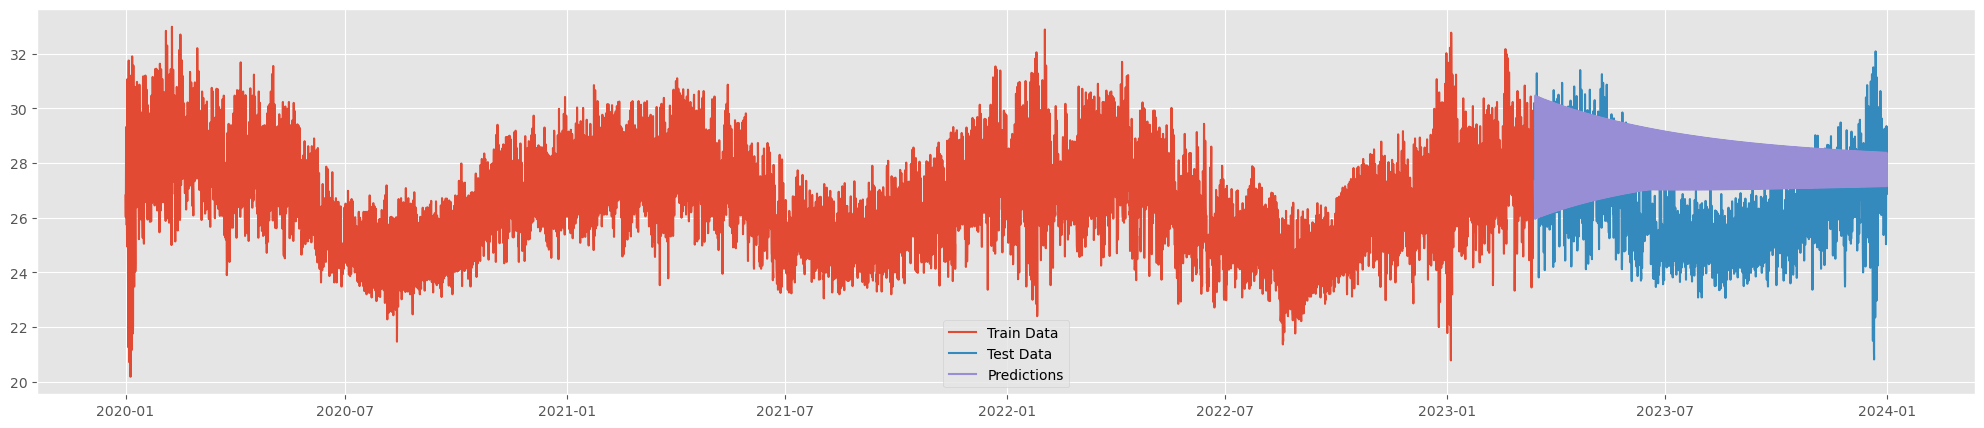

In [39]:
import matplotlib.pyplot as plt

# Obtenez les valeurs prédites
predictions = result.predict(start=0, end=len(ts_train) + len(ts_test) - 1)

# Tracer les données originales
plt.plot(ts_train.index, ts_train, label='Train Data')
plt.plot(ts_test.index, ts_test, label='Test Data')

# Tracer les valeurs prédites
plt.plot(ts_test.index, predictions[len(ts_train):], label='Predictions')

plt.legend()
plt.show()

In [ ]:
# SARIMAX

In [11]:
# From PACF plot
p_values = range(0,12)
# From ACF plot
q_values = range(0,12)
# We saw that single differencing transformed the ts into a stationary one
d_values = range(0,2)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_order_aic_score, best_order_aic_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model = SARIMAX(ts_train, order=order).fit()
                if model.aic < best_order_aic_score:
                    best_order_aic_score, best_order_aic_cfg = model.aic, order
                    print(f'SARIMAX{order} AIC={model.aic:.3f}')
            except:
                continue

print(f'Best SARIMAX{best_order_aic_cfg} AIC={best_order_aic_score:.3f}')

SARIMAX(0, 0, 0) AIC=87738.040
SARIMAX(0, 0, 1) AIC=75373.535
SARIMAX(0, 0, 2) AIC=63892.625
SARIMAX(0, 0, 3) AIC=55998.282
SARIMAX(0, 0, 4) AIC=48520.801
SARIMAX(0, 0, 5) AIC=46998.197
SARIMAX(0, 0, 7) AIC=38268.804
SARIMAX(0, 0, 10) AIC=33209.892
SARIMAX(0, 1, 0) AIC=30260.397
SARIMAX(0, 1, 1) AIC=28475.853
SARIMAX(0, 1, 2) AIC=26721.124
SARIMAX(0, 1, 3) AIC=24585.229
SARIMAX(0, 1, 4) AIC=24581.999
SARIMAX(0, 1, 5) AIC=23898.143
SARIMAX(0, 1, 6) AIC=23362.048
SARIMAX(0, 1, 8) AIC=22082.934
SARIMAX(0, 1, 9) AIC=22006.208
SARIMAX(0, 1, 10) AIC=20886.224
SARIMAX(0, 1, 11) AIC=20458.163
SARIMAX(1, 1, 11) AIC=20452.348
SARIMAX(2, 0, 11) AIC=20435.540
SARIMAX(2, 1, 4) AIC=20188.046
SARIMAX(2, 1, 6) AIC=19369.421
SARIMAX(2, 1, 7) AIC=19050.412
SARIMAX(2, 1, 9) AIC=18816.678
SARIMAX(2, 1, 10) AIC=18054.887
SARIMAX(2, 1, 11) AIC=17787.978
SARIMAX(4, 1, 4) AIC=16119.787
SARIMAX(4, 1, 5) AIC=15349.247
SARIMAX(4, 1, 6) AIC=15286.871
SARIMAX(4, 1, 7) AIC=15059.970
SARIMAX(4, 1, 8) AIC=14994.287
S

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

#ts_train_val = pd.concat([ts_train,ts_val], axis=0)
best_order = (6, 0, 2)
model_sarimax = SARIMAX(ts_train, order=best_order).fit()
ts_pred = model_sarimax.predict(start=ts_test.index[0], end=ts_test.index[-1])
rmse = mean_squared_error(ts_test.values, ts_pred.values, squared=False)
print(f'SARIMAX{best_order}\nAIC={model_sarimax.aic:.2f}\nRMSE (test)={rmse:.2f}')

SARIMAX(6, 0, 2)
AIC=18.00
RMSE (test)=26.22


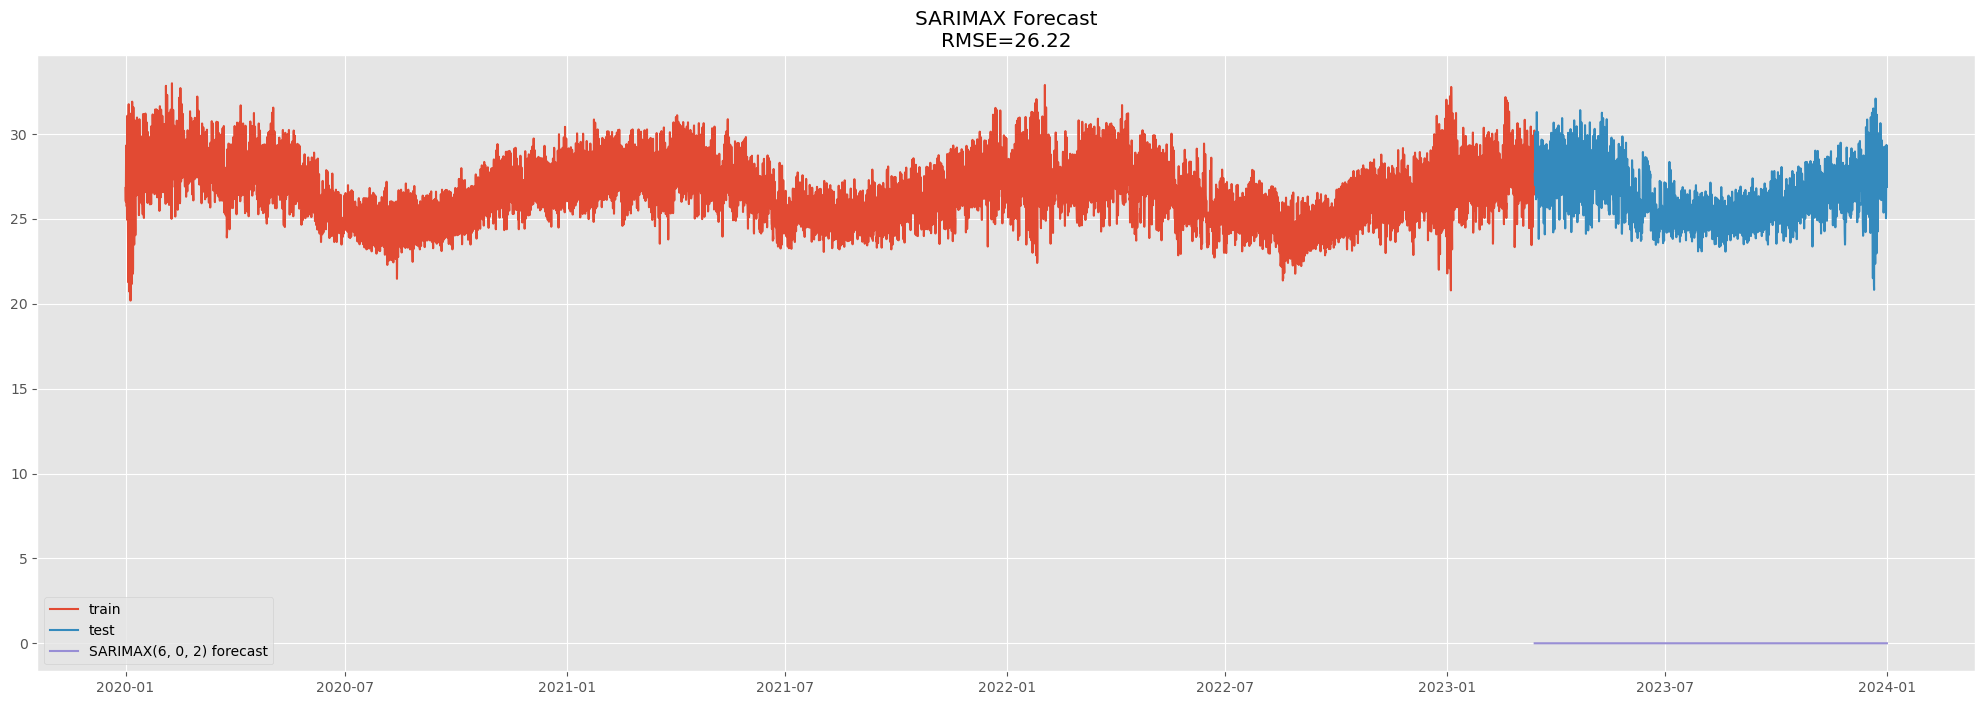

In [27]:
plt.figure()
plt.plot(ts_train.index, ts_train.values, label='train')
plt.plot(ts_test.index, ts_test.values, label='test')
plt.plot(ts_pred.index, ts_pred.values, label=f'SARIMAX{best_order} forecast')
plt.legend(loc='best')
plt.title(f'SARIMAX Forecast\nRMSE={rmse:.2f}')
plt.show()

In [ ]:
# Tuning seasonal parameters of SARIMAX

In [14]:
P_values = range(0,2)
Q_values = range(0,4)
D_values = range(0,2)
s = 8

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (6, 0, 2)
best_score_aic, best_cfg_aic = float("inf"), None

for P in P_values:
    for D in D_values:
        for Q in Q_values:
            seasonal_order=(P, D, Q, s)
            try:
                model = SARIMAX(ts_train, order=order, seasonal_order=seasonal_order).fit()
                if model.aic < best_score_aic:
                    best_score_aic, best_cfg_aic = model.aic, seasonal_order
                    print(f'SARIMAX{order}{seasonal_order} AIC={model.aic:.3f}')
            except:
                continue

print(f'Best SARIMAX{order}{best_cfg_aic} AIC={best_score_aic:.3f}')

SARIMAX(6, 0, 2)(0, 0, 0, 8) AIC=18.000
Best SARIMAX(6, 0, 2)(0, 0, 0, 8) AIC=18.000


In [ ]:
# Faire la prediction

In [16]:
from sklearn.metrics import mean_squared_error

#ts_train_val = pd.concat([ts_train,ts_val], axis=0)
order = (6, 0, 2)
seasonal_order = (0, 0, 0, 8)
model_sarimax = SARIMAX(ts_train, order=order, seasonal_order=seasonal_order).fit()
ts_pred = model_sarimax.predict(start=ts_test.index[0], end=ts_test.index[-1])
rmse = mean_squared_error(ts_test.values, ts_pred.values, squared=False)
print(f'SARIMAX{order}{seasonal_order}\nAIC={model_sarimax.aic:.2f}\nRMSE (test)={rmse:.2f}')

SARIMAX(6, 0, 2)(0, 0, 0, 8)
AIC=18.00
RMSE (test)=26.22


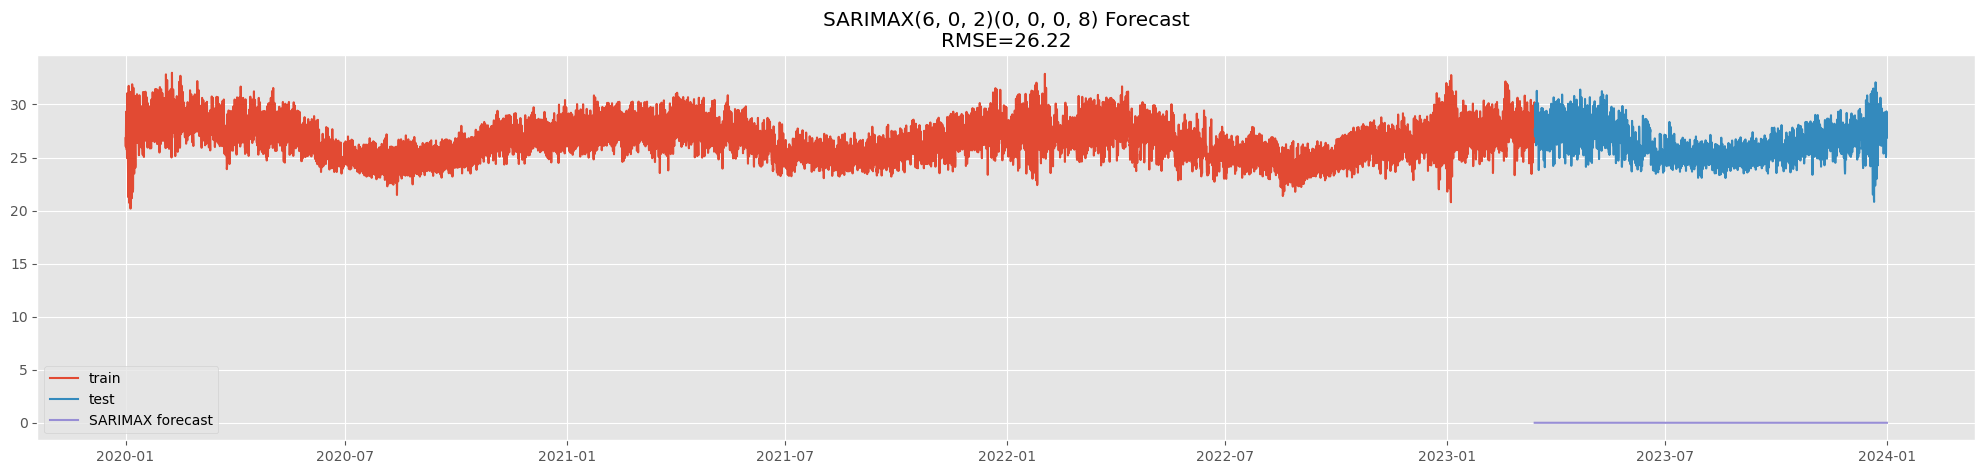

In [18]:
plt.figure()
plt.plot(ts_train.index, ts_train.values, label='train')
plt.plot(ts_test.index, ts_test.values, label='test')
plt.plot(ts_pred.index, ts_pred.values, label=f'SARIMAX forecast')
plt.legend(loc='best')
plt.title(f'SARIMAX{order}{seasonal_order} Forecast\nRMSE={rmse:.2f}')
plt.show()

In [ ]:
# Les Methodes ML

In [ ]:
# Regression Lineaire 

In [20]:
value_column = 'temperature_2m'

for i in range(1, 8):
    data1[f"lag_{i}"] = data1[value_column].shift(i)
data1.head()

,temperature_2m,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2020-01-01 00:00:00,26.817833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,26.101166,26.817833,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 06:00:00,26.017833,26.101166,26.817833,NaN,NaN,NaN,NaN,NaN
2020-01-01 09:00:00,28.117833,26.017833,26.101166,26.817833,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,29.317832,28.117833,26.017833,26.101166,26.817833,NaN,NaN,NaN


In [21]:
data1.dropna(inplace=True)
data1.head()

,temperature_2m,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2020-01-01 21:00:00,27.151166,27.251166,28.601166,29.317832,28.117833,26.017833,26.101166,26.817833
2020-01-02 00:00:00,25.734500,27.151166,27.251166,28.601166,29.317832,28.117833,26.017833,26.101166
2020-01-02 03:00:00,26.201166,25.734500,27.151166,27.251166,28.601166,29.317832,28.117833,26.017833
2020-01-02 06:00:00,24.951166,26.201166,25.734500,27.151166,27.251166,28.601166,29.317832,28.117833
2020-01-02 09:00:00,28.684500,24.951166,26.201166,25.734500,27.151166,27.251166,28.601166,29.317832


In [22]:
from sklearn.model_selection import train_test_split

X = data1.drop(value_column, axis=1)
y = data1[value_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train.shape, X_test.shape

((9928, 7), (1753, 7))

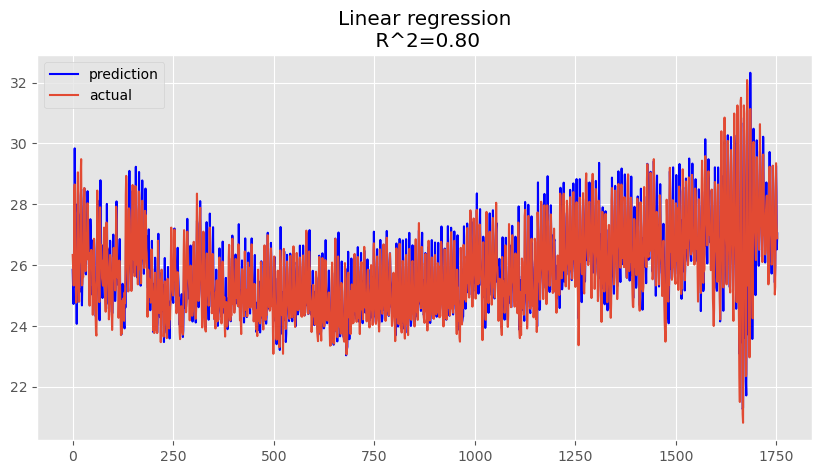

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_pred, "b", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n R^2={r2_score(y_test, y_pred):.2f}");

In [ ]:
# RandomForest

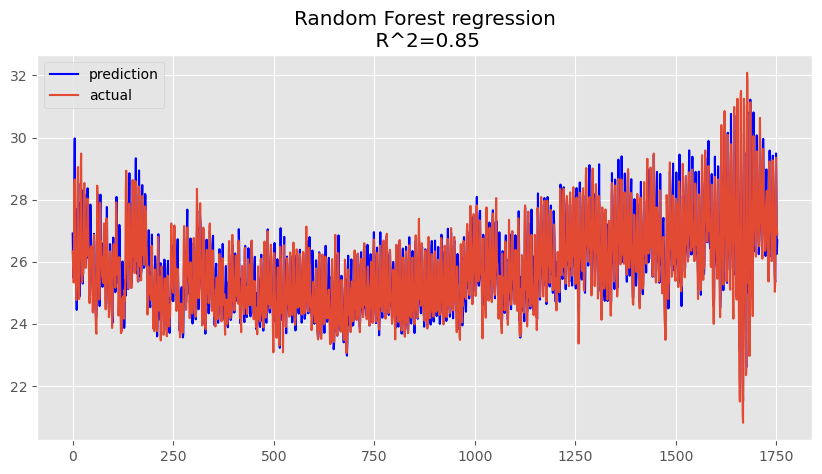

In [26]:
from sklearn.ensemble import RandomForestRegressor

#X_train, X_test, y_train, y_test = preprocess_data(ts_data, lag_end=12)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_pred, "b", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Random Forest regression\n R^2={r2_score(y_test, y_pred):.2f}");

In [ ]:
# Analyse des residus 

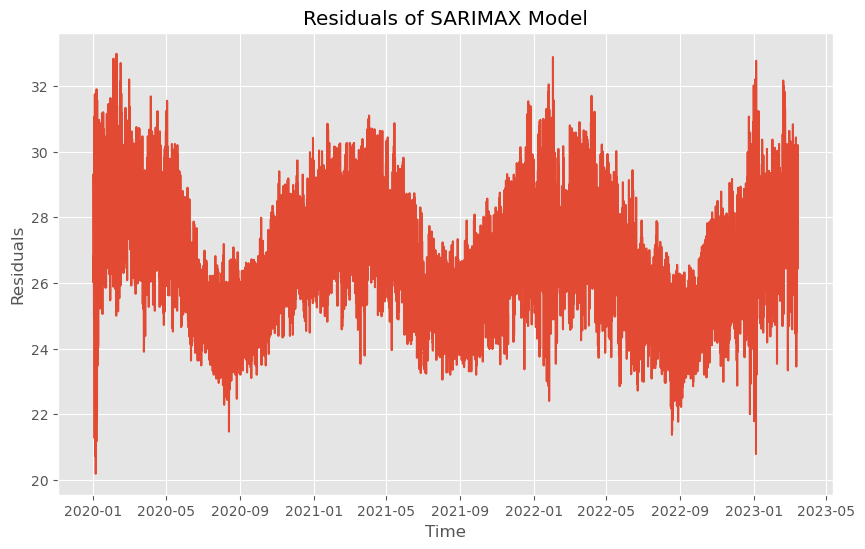

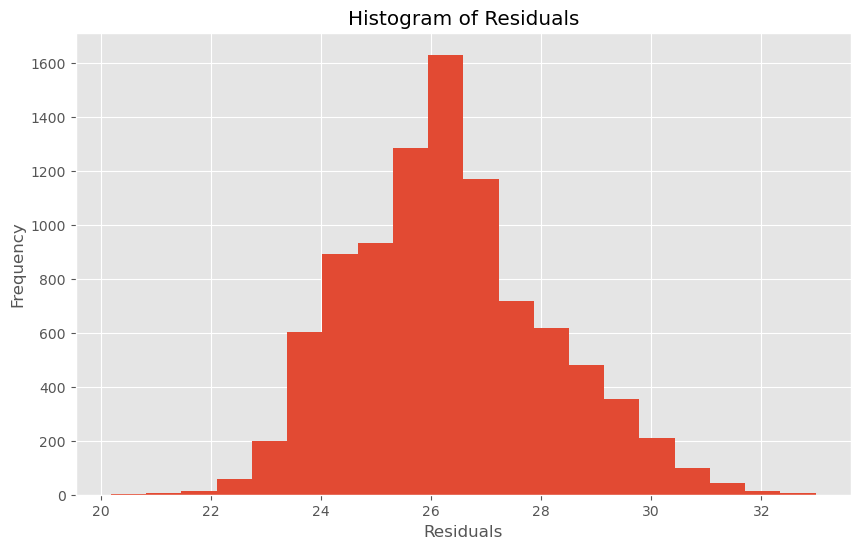

Mean of Residuals: 26.324770543921566
Standard Deviation of Residuals: 1.7944677798757107


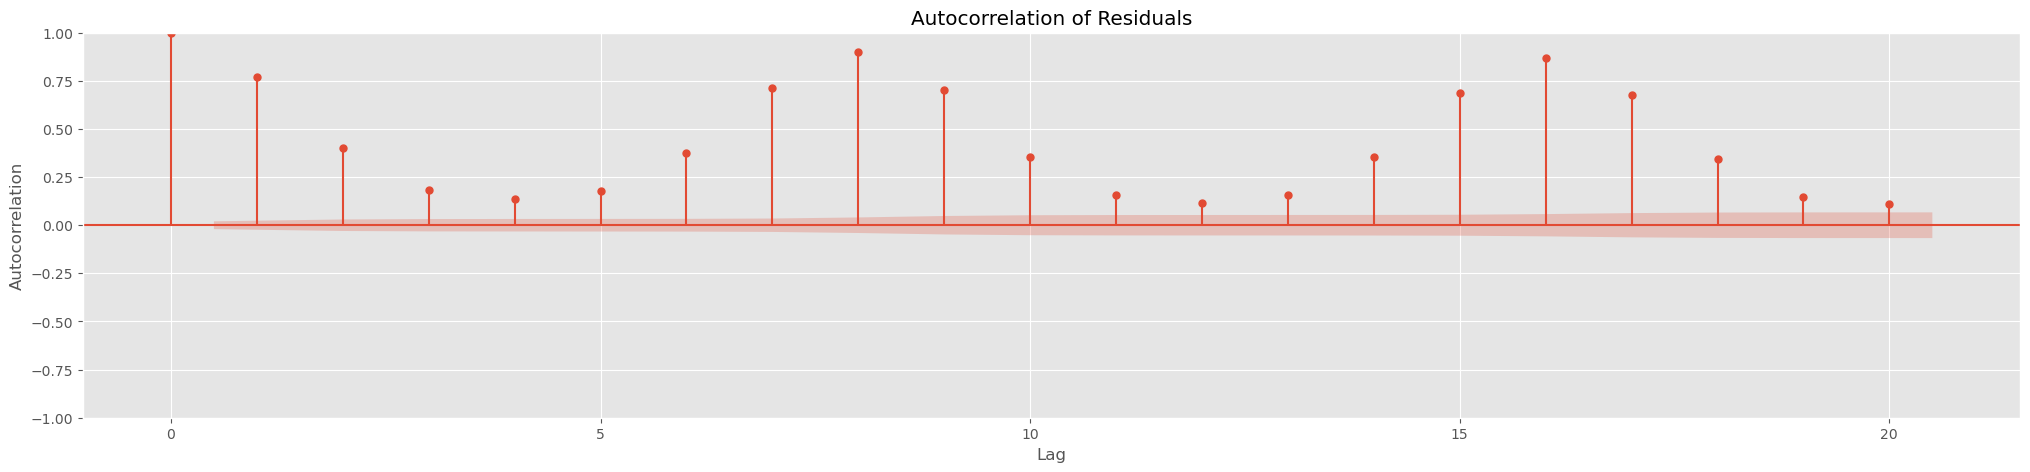

In [29]:
#Calculer les résidus
residuals =model_sarimax.resid

# Analyser les résidus
# Tracez les résidus pour détecter tout modèle de structure temporelle restante
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Afficher l'histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculer la moyenne des résidus
mean_residuals = np.mean(residuals)
print('Mean of Residuals:', mean_residuals)

# Calculer l'écart-type des résidus
std_residuals = np.std(residuals)
print('Standard Deviation of Residuals:', std_residuals)

# Afficher l'autocorrélogramme des résidus
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()